In [114]:

#Importação de bibliotecas

from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm
%matplotlib inline

In [115]:
#importando dataset iris
from sklearn import datasets

In [116]:
#carregando o dataset para o array chamado iris
iris = datasets.load_iris()

In [117]:
#visualizando o nome das features
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [118]:
#nome das classes
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [119]:
#separando dados de treino
treino = iris.data

In [120]:
#separando dados de classes
classes = iris.target

In [121]:
#Visualizando dados de treino
treino[:20]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3]])

In [122]:
#Visualizando a forma do array de classes
classes.shape

(150,)

In [123]:
#visualizando os dados únicos do array de classes
set(classes)

{0, 1, 2}

In [124]:
#Visalizando os dados de classes
classes [:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Visualização de dados

In [125]:
#Plota gráfico de ddispersão dos dados com relação a classe
#Dispersão dos dados de Petal Width e Petal Length com as classes
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Sepal width vs Sepal length')
plt.scatter(treino[:,0], treino[:,1], c=classes)
plt.show()

<IPython.core.display.Javascript object>

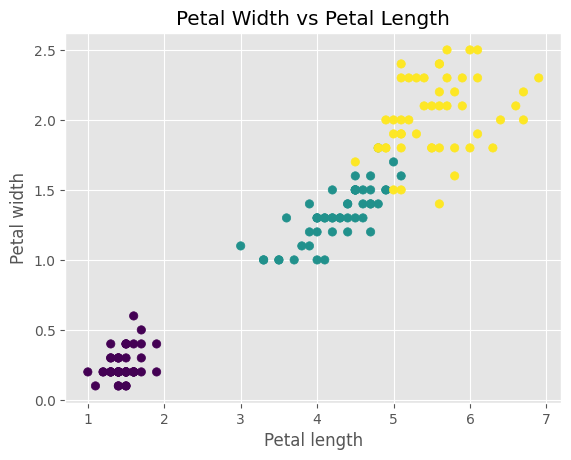

In [126]:
#Plota gráfico de ddispersão dos dados com relação a classe
#Dispersão dos dados de Petal Width e Petal Length com as classes
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Petal Width vs Petal Length')
plt.scatter(treino[:,2], treino[:,3], c=classes)
plt.show()

Aplicando o SVM
Vamos agora aplicar o SVM para classificar flores

In [127]:
#Usaremos 80% dos dados para treino e 20% para teste
len(treino[:-30]), len(classes[:-30])

(120, 120)

In [128]:
#Visualizando dados de treino
treino[: -30]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [129]:
#Visualizando as classes correspondentes
classes [: -30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [130]:
#Treinando o algoritmo SVM
clf = svm.SVC().fit(treino[:-30], classes[: -30])

In [131]:
#objeto clf
clf

SVC()

In [132]:
#Cria um array com os dados de teste
#20% dos dados que não foram testados
teste = treino[-30:]

In [133]:
#Visualizando teste
teste

array([[6.9, 3.2, 5.7, 2.3],
       [5.6, 2.8, 4.9, 2. ],
       [7.7, 2.8, 6.7, 2. ],
       [6.3, 2.7, 4.9, 1.8],
       [6.7, 3.3, 5.7, 2.1],
       [7.2, 3.2, 6. , 1.8],
       [6.2, 2.8, 4.8, 1.8],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2.8, 5.6, 2.1],
       [7.2, 3. , 5.8, 1.6],
       [7.4, 2.8, 6.1, 1.9],
       [7.9, 3.8, 6.4, 2. ],
       [6.4, 2.8, 5.6, 2.2],
       [6.3, 2.8, 5.1, 1.5],
       [6.1, 2.6, 5.6, 1.4],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 3.4, 5.6, 2.4],
       [6.4, 3.1, 5.5, 1.8],
       [6. , 3. , 4.8, 1.8],
       [6.9, 3.1, 5.4, 2.1],
       [6.7, 3.1, 5.6, 2.4],
       [6.9, 3.1, 5.1, 2.3],
       [5.8, 2.7, 5.1, 1.9],
       [6.8, 3.2, 5.9, 2.3],
       [6.7, 3.3, 5.7, 2.5],
       [6.7, 3. , 5.2, 2.3],
       [6.3, 2.5, 5. , 1.9],
       [6.5, 3. , 5.2, 2. ],
       [6.2, 3.4, 5.4, 2.3],
       [5.9, 3. , 5.1, 1.8]])

In [134]:
#Predizendo valores com a porção de dados de teste
clf.predict(teste)

array([2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 1])

In [135]:
#Cria um array com as classes dos dados de teste
classes_teste = classes[-30:]

In [136]:
#Visualizando as classes de teste
classes_teste

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

Visualização dos resultados de classificação

In [137]:
#Gráfico de dispersão entre as colunas Sepal Length, Sepal widt e a classe
#Os pontos roxos são pontos no qual o classificador errou
%matplotlib notebook
from matplotlib import style
style.use('ggplot')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Sepal width vs Sepal length')
plt.scatter(treino[-30:,0], treino[-30:,1], c=clf.predict(teste))
plt.show()


<IPython.core.display.Javascript object>

In [138]:

#Gráfico de dispersão entre as colunas Petal Length, Peta
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Petal Width vs Petal Length')
plt.scatter(treino[:,2], treino[:,3], c=classes)
plt.show()

Aplicando o SVM

In [140]:
#Usaremos 80% dos dados para treino e 20% para teste
len(treino[:-30]), len(classes[:-30])

(120, 120)

In [141]:
#Visualizando os dados de treino
treino [: -30]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [142]:
#Visualizando as classes correspondentes
classes [: -30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [143]:
#Treinando o algoritmo de SVM
clf = svm.SVC().fit(treino[: -30], classes [: -30])

In [144]:
#objeto clf
clf

SVC()

In [145]:
#Cria um array com os dados de teste
# 20% dos dados que não foram testados
teste = treino[ -30:]

In [146]:
# Vusalizando os dados de teste
teste

array([[6.9, 3.2, 5.7, 2.3],
       [5.6, 2.8, 4.9, 2. ],
       [7.7, 2.8, 6.7, 2. ],
       [6.3, 2.7, 4.9, 1.8],
       [6.7, 3.3, 5.7, 2.1],
       [7.2, 3.2, 6. , 1.8],
       [6.2, 2.8, 4.8, 1.8],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2.8, 5.6, 2.1],
       [7.2, 3. , 5.8, 1.6],
       [7.4, 2.8, 6.1, 1.9],
       [7.9, 3.8, 6.4, 2. ],
       [6.4, 2.8, 5.6, 2.2],
       [6.3, 2.8, 5.1, 1.5],
       [6.1, 2.6, 5.6, 1.4],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 3.4, 5.6, 2.4],
       [6.4, 3.1, 5.5, 1.8],
       [6. , 3. , 4.8, 1.8],
       [6.9, 3.1, 5.4, 2.1],
       [6.7, 3.1, 5.6, 2.4],
       [6.9, 3.1, 5.1, 2.3],
       [5.8, 2.7, 5.1, 1.9],
       [6.8, 3.2, 5.9, 2.3],
       [6.7, 3.3, 5.7, 2.5],
       [6.7, 3. , 5.2, 2.3],
       [6.3, 2.5, 5. , 1.9],
       [6.5, 3. , 5.2, 2. ],
       [6.2, 3.4, 5.4, 2.3],
       [5.9, 3. , 5.1, 1.8]])

In [147]:
# Predizendo valores com a porção de dados de teste
clf.predict(teste)

array([2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 1])

In [148]:
#Cria um array com as classes dos dados de teste
classes_teste = classes[ -30:]

In [149]:
#Visualizando as classes de teste
classes_teste

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

Visualizando os resultados de classificação

In [150]:
#Gráfico de dispersão entre as colunas Sepan Length, Sepal width e a classe
#Os pontos roxos são pontos no qual o classificador errrou

%matplotlib notebook
from matplotlib import style
style.use('ggplot')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Sepal width vs Sepal length')
plt.scatter(treino[-30:,0], treino[-30:,1], c=clf.predict(teste))
plt.show()


In [151]:
#Gráfico de dispersão entre as colunas Petal Length, Peta
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Petal Width vs Petal Length')
plt.scatter(treino[-30:,2], treino[-30:,3], c=clf.predict(teste))
plt.show()

In [152]:
#Gráfico de instância e predição destas
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
plt.xlabel('Amostras')
plt.ylabel('Classes')
plt.title('Classes do SVM')
plt.scatter(range(len(classes_teste)), classes_teste, c= clf.predict(teste))

Matriz de Confusão

In [153]:
print(pd.crosstab(classes_teste, clf.predict(teste), rownames = ['Real'], colnames = ['Predito'], margins = True), "")

Predito  1   2  All
Real               
2        9  21   30
All      9  21   30 


Cross Validation

In [155]:
#Função que retorna a acúracia após fazer uma validação cruzada
def Acuracia (clf, X, y):
  resultados = cross_val_predict(clf, X, y, cv=5)
  return metrics.accuracy_score(y, resultados)

In [156]:
Acuracia(clf, treino, classes)

0.9666666666666667

Métricas de Avaliação

In [ ]:
#Imprime as métricas precisão, recall e medida F1
resultados = cross_val_predict(clf, treino, classes, cv=5)
valor_classes = [0,1,2]
print (metrics.classification_report(classes, resultados, valor_classes))